In [5]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [17]:
os.getcwd()

'C:\\Users\\dream'

In [26]:
for dirname, _, filenames in os.walk('./kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./kaggle/input\covid19_tweets.csv


In [15]:
os.getcwd()

'C:\\Users\\dream'

In [20]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [22]:
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [23]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [25]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# covid19_tweets.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv('./kaggle/input/covid19_tweets.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'covid19_tweets.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 13 columns


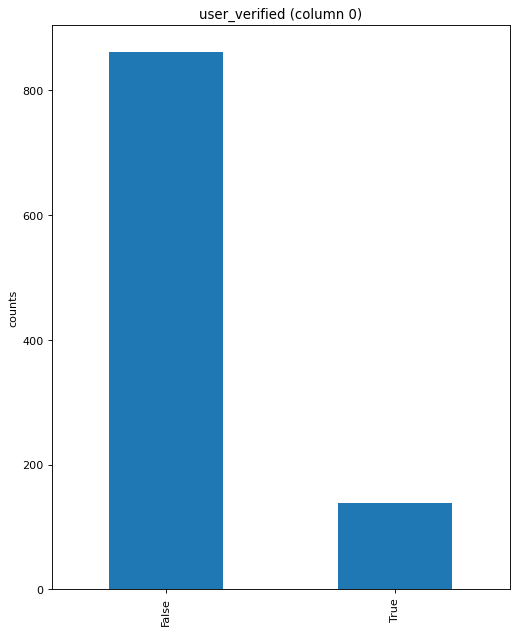

In [29]:
plotPerColumnDistribution(df1, 10, 5)

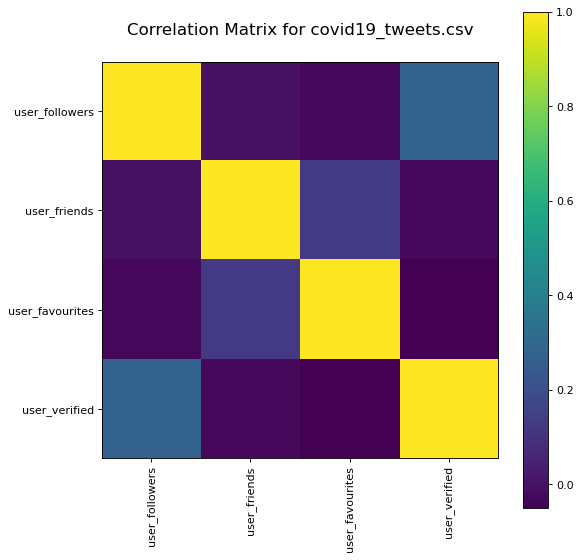

In [30]:
plotCorrelationMatrix(df1, 8)

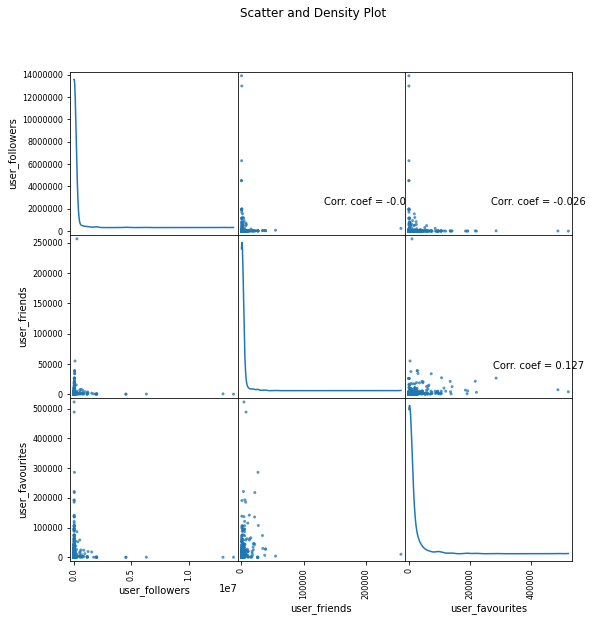

In [31]:
plotScatterMatrix(df1, 9, 10)

In [32]:
tweets = df1
tweets.describe()

,user_followers,user_friends,user_favourites
count,1.000000e+03,1000.000000,1000.000000
mean,8.230860e+04,2081.115000,11417.735000
std,6.898829e+05,9233.892462,33537.115217
min,0.000000e+00,0.000000,0.000000
25%,1.717500e+02,117.750000,143.750000
50%,1.090500e+03,493.500000,1556.500000
75%,5.778500e+03,1611.000000,8989.000000
max,1.389280e+07,256510.000000,523042.000000


In [33]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   user_name         1000 non-null   object
 1   user_location     790 non-null    object
 2   user_description  947 non-null    object
 3   user_created      1000 non-null   object
 4   user_followers    1000 non-null   int64 
 5   user_friends      1000 non-null   int64 
 6   user_favourites   1000 non-null   int64 
 7   user_verified     1000 non-null   bool  
 8   date              1000 non-null   object
 9   text              1000 non-null   object
 10  hashtags          718 non-null    object
 11  source            1000 non-null   object
 12  is_retweet        1000 non-null   bool  
dtypes: bool(2), int64(3), object(8)
memory usage: 88.0+ KB


In [35]:
# get the location data
locations = tweets[['user_location', 'date']]
locations = locations[locations['user_location'].notnull()]
locations

,user_location,date
0,astroworld,2020-07-25 12:27:21
1,"New York, NY",2020-07-25 12:27:17
2,"Pewee Valley, KY",2020-07-25 12:27:14
3,Stuck in the Middle,2020-07-25 12:27:10
4,Jammu and Kashmir,2020-07-25 12:27:08
...,...,...
992,Global,2020-07-25 11:58:57
993,"New York, USA",2020-07-25 11:58:55
995,United States,2020-07-25 11:58:54
998,"Mombasa, Kenya",2020-07-25 11:58:47


In [43]:
top_locations = locations.groupby('user_location').user_location.count().to_frame('counts').reset_index()

AttributeError: 'DataFrameGroupBy' object has no attribute 'show'

In [47]:
locations.groupby('user_location').user_location.count().to_frame('counts').reset_index()

,user_location,counts
0,Fl,1
1,Global,1
2,I ♥️ I ♥️ I ♥️ I,1
3,#AFRICA #MENA,6
4,#MaskUpNigeria,1
...,...,...
497,☁️,2
498,❌,1
499,🇳🇬,1
500,🇵🇹,1


In [46]:
locations.groupby('user_location').user_location.count().to_frame('counts')

,counts
user_location,
Fl,1
Global,1
I ♥️ I ♥️ I ♥️ I,1
#AFRICA #MENA,6
#MaskUpNigeria,1
...,...
☁️,2
❌,1
🇳🇬,1
